In [40]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

In [22]:
# Load the MNIST dataset
mnist = datasets.fetch_openml("mnist_784")

c:\Users\maula\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [41]:

# Mengambil data dan label
X = mnist.data.astype('float32')
y = mnist.target.astype('int')

In [42]:

scalling = MinMaxScaler()
X_scalling = scalling.fit_transform(X)

In [52]:
from sklearn.decomposition import PCA
# Apply PCA to reduce dimensionality
n_components = 50  # You can adjust this value as needed
pca = PCA(n_components =n_components, whiten=True, random_state=42)
X_pca = pca.fit_transform(X_scalling)


In [54]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [55]:
# Define the ANN model
from tensorflow import keras

layers = tf.keras.layers;

model = keras.Sequential([
  layers.Flatten(input_shape=(n_components,)),
    layers.Dense(128, activation='relu'),  # Hidden layer with 128 units and ReLU activation
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 units and ReLU activation
    layers.Dense(10, activation='softmax')  # Output layer with 10 units (one for each digit) and softmax activation
])


In [56]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 50)                0         
                                                                 
 dense_18 (Dense)            (None, 128)               6528      
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 10)                650       
                                                                 
Total params: 15434 (60.29 KB)
Trainable params: 15434 (60.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [58]:

history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
700/700 [==============================] - 2s 2ms/step - loss: 0.4423 - accuracy: 0.8773 - val_loss: 0.1937 - val_accuracy: 0.9424
Epoch 2/20
700/700 [==============================] - 1s 2ms/step - loss: 0.1476 - accuracy: 0.9570 - val_loss: 0.1359 - val_accuracy: 0.9602
Epoch 3/20
700/700 [==============================] - 1s 2ms/step - loss: 0.1025 - accuracy: 0.9696 - val_loss: 0.1122 - val_accuracy: 0.9665
Epoch 4/20
700/700 [==============================] - 1s 2ms/step - loss: 0.0768 - accuracy: 0.9766 - val_loss: 0.1052 - val_accuracy: 0.9674
Epoch 5/20
700/700 [==============================] - 1s 2ms/step - loss: 0.0614 - accuracy: 0.9815 - val_loss: 0.0939 - val_accuracy: 0.9708
Epoch 6/20
700/700 [==============================] - 1s 2ms/step - loss: 0.0502 - accuracy: 0.9847 - val_loss: 0.0960 - val_accuracy: 0.9679
Epoch 7/20
700/700 [==============================] - 2s 2ms/step - loss: 0.0405 - accuracy: 0.9881 - val_loss: 0.0958 - val_accuracy: 0.9704
Epoch 

In [59]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

438/438 - 1s - loss: 0.1384 - accuracy: 0.9717 - 801ms/epoch - 2ms/step
Test accuracy: 97.17%


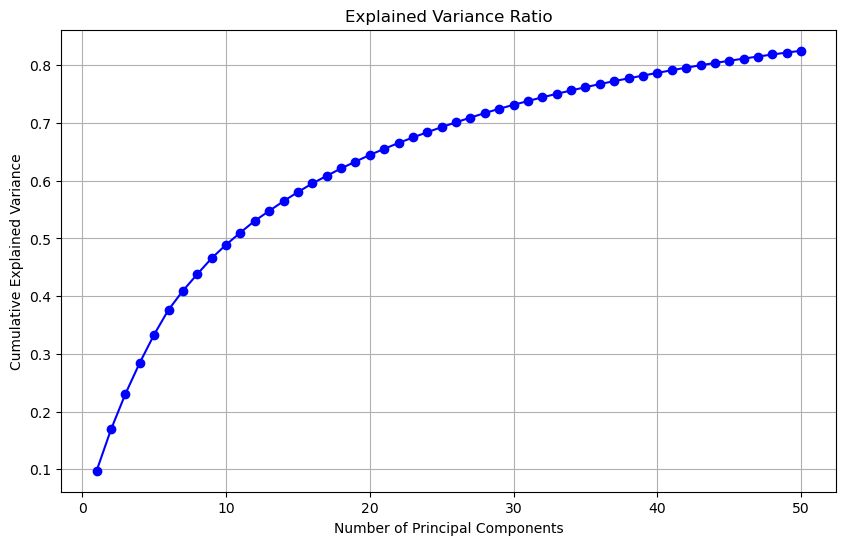

In [61]:
import numpy as np
import matplotlib.pyplot as plt
# Plot the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), cumulative_explained_variance, marker='o', linestyle='-', color='b')
plt.title("Explained Variance Ratio")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()


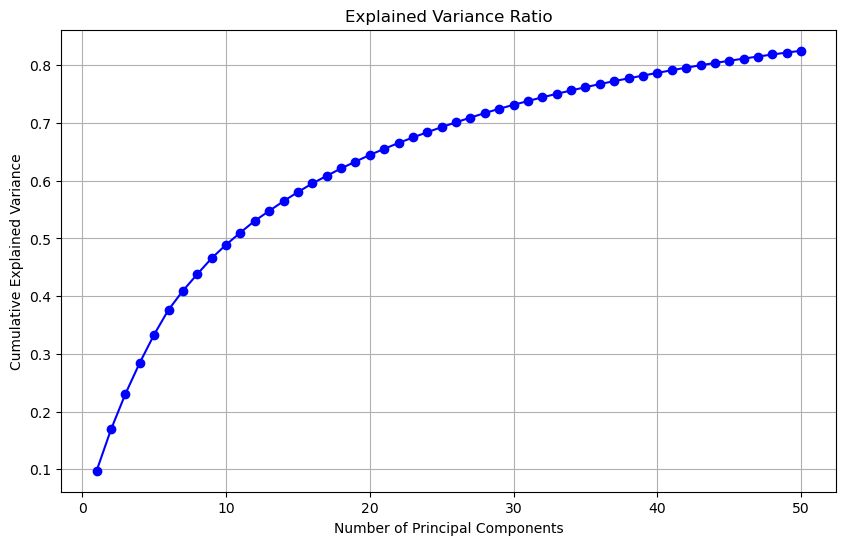

In [62]:
# Plot the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), cumulative_explained_variance, marker='o', linestyle='-', color='b')
plt.title("Explained Variance Ratio")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()
